In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv(r'C:\Users\DELL\Downloads\9961_14084_bundle_archive\Train.csv')

In [301]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory data analysis

finding shape of the dataset

In [302]:
dataset.shape

(8523, 12)

In [303]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


checking
 null values in the dataset

In [304]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [305]:
per = dataset.isnull().sum() * 100 / len(dataset)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [306]:
dataset.duplicated().any()

False

Handling missing values

In [307]:
dataset['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [308]:
dataset['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

Univariate Inputation

In [309]:
mean_weight=dataset['Item_Weight'].mean()
median_weight=dataset['Item_Weight'].median()
print(mean_weight)
print(median_weight)

12.857645184135976
12.6


In [310]:
dataset['item_weight_mean']=dataset['Item_Weight'].fillna(mean_weight)
dataset['item_weight_median']=dataset['Item_Weight'].fillna(median_weight)
print(dataset['item_weight_mean'],dataset['item_weight_median'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: item_weight_mean, Length: 8523, dtype: float64 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: item_weight_median, Length: 8523, dtype: float64


In [311]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_mean,item_weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [312]:
print("original weight variable var",dataset['Item_Weight'].var())
print("Item weight var after mean imputation",dataset['item_weight_mean'].var())
print("item weight var after median imputation",dataset['item_weight_median'].var())

original weight variable var 21.561688259836558
Item weight var after mean imputation 17.86012173506058
item weight var after median imputation 17.869561454073647


Mean and median Inputation analysis

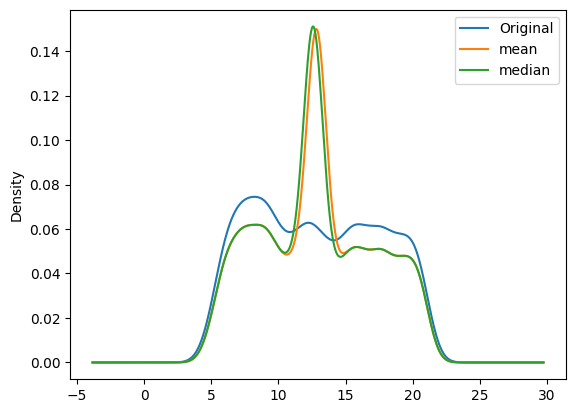

In [313]:
dataset['Item_Weight'].plot(kind="kde",label="Original")
dataset['item_weight_mean'].plot(kind="kde",label="mean")
dataset['item_weight_median'].plot(kind="kde",label="median")

plt.legend()
plt.show()

<Axes: >

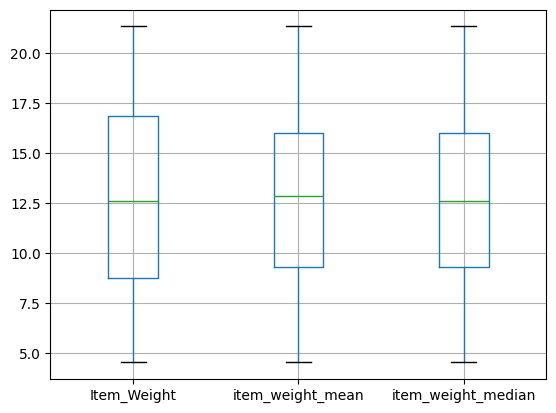

In [314]:
dataset[['Item_Weight','item_weight_mean','item_weight_median']].boxplot()

Interpolation

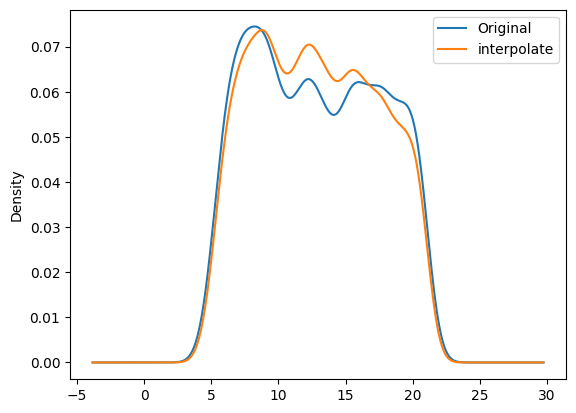

In [315]:
dataset['item_weight_interpolate']=dataset['Item_Weight'].interpolate(method='linear')
dataset['Item_Weight'].plot(kind="kde",label="Original")
dataset['item_weight_interpolate'].plot(kind="kde",label="interpolate")
plt.legend()
plt.show()

<Axes: >

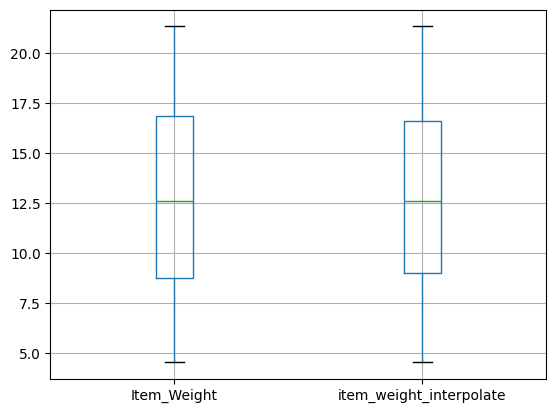

In [316]:
dataset[['Item_Weight','item_weight_interpolate']].boxplot()

In [317]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'item_weight_mean',
       'item_weight_median', 'item_weight_interpolate'],
      dtype='object')

In [318]:
dataset=dataset.drop(['Item_Weight','item_weight_mean','item_weight_median'],axis=1)
dataset.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [319]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
item_weight_interpolate         0
dtype: int64

Outlet_Size

In [320]:
dataset['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [321]:
dataset['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [322]:
mode_outlet=dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [323]:
missing_values=dataset['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [324]:
dataset.loc[missing_values,'Outlet_Size']=dataset.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [325]:
dataset.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
item_weight_interpolate      0
dtype: int64

In [326]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'item_weight_interpolate'],
      dtype='object')

Item_Fat_Content

In [327]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [328]:
dataset.replace({'Item_Fat_Content':{'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'}},inplace=True)

In [329]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [330]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'item_weight_interpolate'],
      dtype='object')

In [331]:
dataset['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [332]:
dataset['item_visibility_interpolate']=dataset['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')
dataset['item_visibility_interpolate'].value_counts()

item_visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

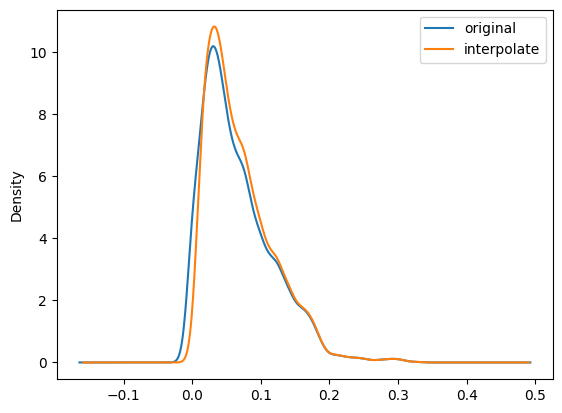

In [333]:
dataset['Item_Visibility'].plot(kind="kde",label="original")
dataset['item_visibility_interpolate'].plot(kind="kde",label="interpolate")
plt.legend()
plt.show()

In [334]:
dataset=dataset.drop('Item_Visibility',axis=1)

In [335]:
dataset.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_interpolate,item_visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [336]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'item_weight_interpolate', 'item_visibility_interpolate'],
      dtype='object')

In [337]:
dataset['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDL34    8
FDX15    6
FDS58    5
FDZ23    7
FDS39    3
Name: count, dtype: int64

In [338]:
dataset['Item_Identifier']=dataset['Item_Identifier'].apply(lambda x:x[:2])
dataset['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [339]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'item_weight_interpolate', 'item_visibility_interpolate'],
      dtype='object')

In [340]:
dataset['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

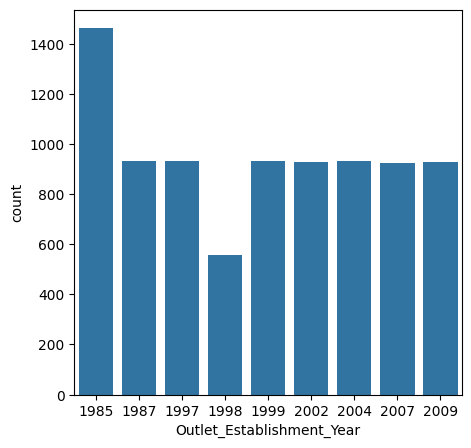

In [341]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year',data=dataset)
plt.show()

In [342]:
import datetime as dt

In [343]:
current_year=dt.datetime.today().year
current_year

2024

In [344]:
dataset['outlet_age']=current_year-dataset['Outlet_Establishment_Year']
dataset['outlet_age'].head()

0    25
1    15
2    25
3    26
4    37
Name: outlet_age, dtype: int64

In [345]:
dataset.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_interpolate,item_visibility_interpolate,outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15


In [346]:
dataset=dataset.drop('Outlet_Establishment_Year',axis=1)

In [347]:
dataset.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_interpolate,item_visibility_interpolate,outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [348]:
from sklearn.preprocessing import OrdinalEncoder

In [349]:
data_encoded=dataset.copy()

In [350]:
cate_cols=dataset.select_dtypes(include=['object']).columns

In [351]:
for col in cate_cols:
    OE=OrdinalEncoder()
    data_encoded[col]=OE.fit_transform(data_encoded[[col]])
    print(OE.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [352]:
data_encoded.head(10)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_interpolate,item_visibility_interpolate,outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.930,0.014751,37
5,1.0,1.0,0.0,51.4008,3.0,1.0,2.0,2.0,556.6088,10.395,0.013746,15
6,1.0,1.0,13.0,57.6588,1.0,0.0,2.0,1.0,343.5528,13.650,0.012741,37
7,1.0,0.0,13.0,107.7622,5.0,1.0,2.0,3.0,4022.7636,14.925,0.127470,39
8,1.0,1.0,5.0,96.9726,7.0,2.0,1.0,1.0,1076.5986,16.200,0.016687,22
9,1.0,1.0,5.0,187.8214,2.0,2.0,1.0,1.0,4710.5350,19.200,0.094450,17


In [353]:
x_data=data_encoded.drop('Item_Outlet_Sales',axis=1)
y_data=data_encoded['Item_Outlet_Sales']
y_data

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Linear Regression

In [354]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR = LinearRegression()
score = cross_val_score(LR,x_data,y_data,cv=5,scoring='r2')
score.mean()

0.5015470931017388

XGBRFRegression

In [355]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators=100,random_state=42)
score = cross_val_score(xg,x_data,y_data,cv=5,scoring='r2')
score.mean()

0.5954067732342189

Random forest regressor

In [356]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
score = cross_val_score(rf,x_data,y_data,cv=5,scoring='r2')
score.mean()

0.5549992903957147

XGBRFREGRegressor feature importances

In [357]:
xg= XGBRFRegressor(n_estimators=100,random_state=42)
xg1 = xg.fit(x_data,y_data)
pd.DataFrame({
    'feature':x_data.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance',ascending=False)


,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,outlet_age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,item_visibility_interpolate,0.002493
8,item_weight_interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


In [358]:

Final_data=x_data.drop(columns=['item_visibility_interpolate','item_weight_interpolate','Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)
Final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


Best model

In [359]:
from xgboost import XGBRFRegressor
xg_Final= XGBRFRegressor(base_score=0.5,booster='gbtree',colsample_bylevel=1,colsample_bytree=1,gamma=0,gpu_id=-1,importance_type='gain',interaction_constraints='',max_delta_step=0,max_depth=6,min_child_weight=1,missing=np.nan,monotone_constraints='()',n_estimators=100,n_jobs=4,num_parallel_tree=100,objective='reg:squarederror',random_state=0,reg_alpha=0,scale_pos_weight=1,tree_method='exact',validate_parameters=1,verbosity=None)
xg_Final.fit(Final_data,y_data)


XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy=None, importance_type='gain',
               interaction_constraints='', max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints='()', multi_strategy=None, n_estimators=100,
               n_jobs=4, num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, ...)

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

x_data_train,x_data_test,y_data_train,y_data_test=train_test_split(Final_data,y_data,test_size=0.20,random_state=42)
xg_Final.fit(x_data_train,y_data_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy=None, importance_type='gain',
               interaction_constraints='', max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints='()', multi_strategy=None, n_estimators=100,
               n_jobs=4, num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, ...)

In [361]:
y_pred = xg_Final.predict(x_data_test)

In [362]:
mean_absolute_error(y_data_test,y_pred)

714.4168458622603

In [363]:
pred = xg_Final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)
new_pred=xg_Final.predict(np.array([[149.0418,3.0,1.0,2.0,15]]))[0]
print(new_pred)

2059.0977
2349.1763


In [364]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
MSE = mean_squared_error(y_data_test,y_pred)
RMSE = np.sqrt(MSE)
RMSE

1021.167965996744

In [365]:
MAPE = mean_absolute_percentage_error(y_data_test,y_pred)
print(f'Mean Absolute Percentage Error:{MAPE:.2f}%')

Mean Absolute Percentage Error:0.56%


In [366]:
print(f"Sales value is between {pred-714.42} and {pred+714.42}")

Sales value is between 1344.67765625 and 2773.51765625


TEST DATASET

In [367]:
test_dataset =pd.read_csv(r"C:\Users\DELL\Downloads\9961_14084_bundle_archive\Test.csv")
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [368]:
test_dataset.shape

(5681, 11)

In [369]:
test_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [370]:
test_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [371]:
test_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [372]:
test_dataset.duplicated().any()

False

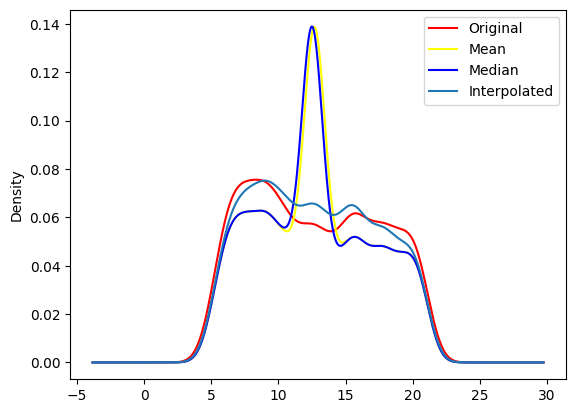

In [373]:
mean_wgt=test_dataset["Item_Weight"].mean()
median_wgt=test_dataset["Item_Weight"].median()
test_dataset["Item_Weight_mean"]=test_dataset["Item_Weight"].fillna(mean_wgt)
test_dataset["Item_Weight_median"]=test_dataset["Item_Weight"].fillna(median_wgt)
test_dataset["Item_Weight_interpolation_imputation"]=test_dataset["Item_Weight"].interpolate("linear")
test_dataset["Item_Weight"].plot(kind="kde",color="red",label="Original")
test_dataset["Item_Weight_mean"].plot(kind="kde",color="yellow",label="Mean")
test_dataset["Item_Weight_median"].plot(kind="kde",color="blue",label="Median")
test_dataset["Item_Weight_interpolation_imputation"].plot(kind="kde",label="Interpolated")
plt.legend()
plt.show()

In [374]:
test_dataset['Item_Weight'].var()

21.760812343231528

In [375]:
test_dataset['Item_Weight_mean'].var()

18.021630503972027

In [376]:
test_dataset['Item_Weight_median'].var()

18.027077062656037

<Axes: >

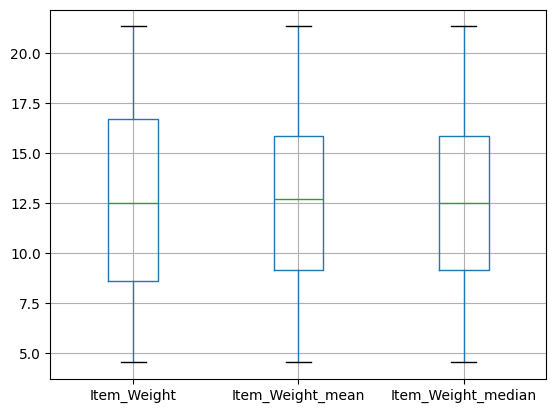

In [377]:
test_dataset[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

<Axes: >

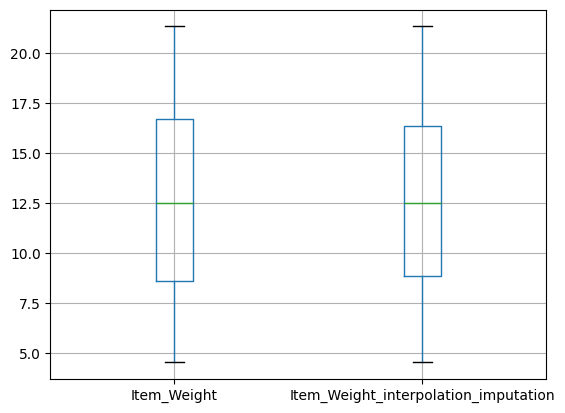

In [378]:
test_dataset[['Item_Weight','Item_Weight_interpolation_imputation']].boxplot()

In [379]:
print(test_dataset['Item_Weight'].var())
print(test_dataset['Item_Weight_interpolation_imputation'].var())

21.760812343231528
19.990913374786317


In [380]:
data=test_dataset.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)

In [381]:
data["Outlet_Size"]

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [382]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [383]:
pivot_table = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
pivot_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [384]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [385]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :pivot_table[x])
data.isnull().sum()

Item_Identifier                         0
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                             0
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Weight_interpolation_imputation    0
dtype: int64

<Axes: xlabel='Outlet_Size'>

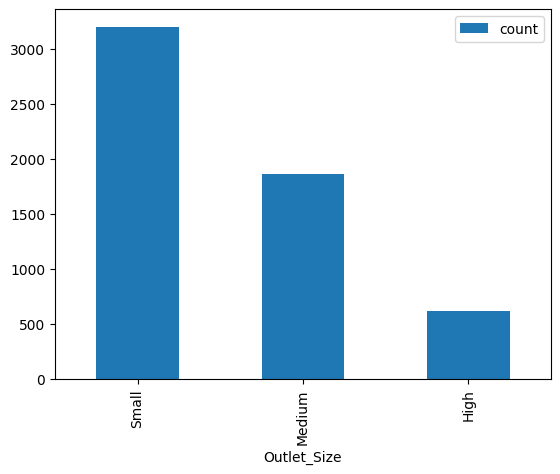

In [386]:
Outletsize=pd.DataFrame(data['Outlet_Size'].value_counts())
Outletsize.plot(kind="bar")

In [387]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

In [388]:
ItemFat=pd.DataFrame(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content'>

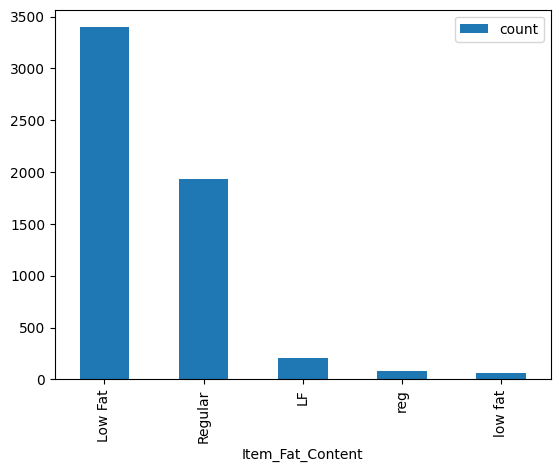

In [389]:
ItemFat.plot(kind='bar')

In [390]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [391]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content'>

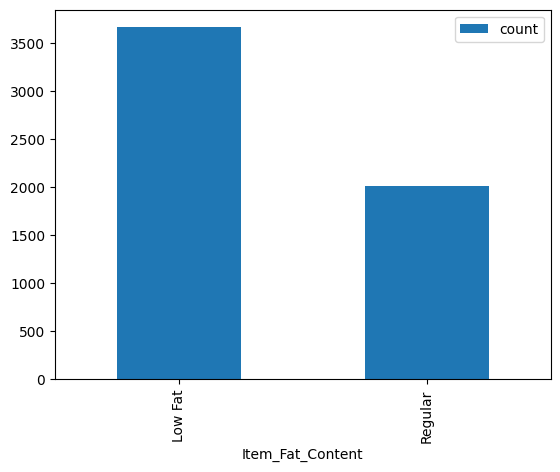

In [392]:
ItemFat=pd.DataFrame(data['Item_Fat_Content'].value_counts())
ItemFat.plot(kind='bar')

In [393]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

In [394]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation'],
      dtype='object')

In [395]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [396]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [397]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.093531    2
0.072816    2
0.202948    2
0.107493    2
0.112131    2
           ..
0.089452    1
0.133171    1
0.103428    1
0.073685    1
0.104720    1
Name: count, Length: 5629, dtype: int64

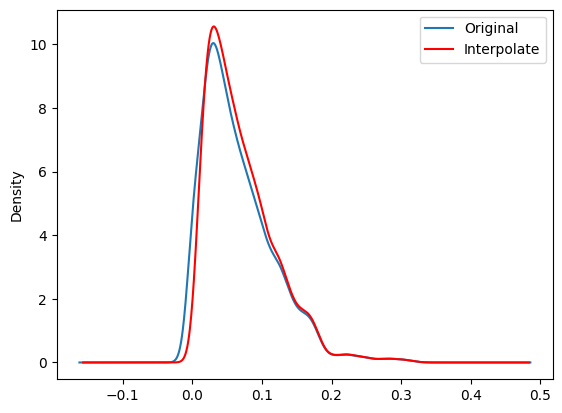

In [398]:
data['Item_Visibility'].plot(kind="kde",label="Original")
data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")
plt.legend()
plt.show()

In [399]:
data = data.drop('Item_Visibility',axis=1)

In [400]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate
0,FDW58,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.7500,0.007565
1,FDW14,Regular,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,8.3000,0.038428
2,NCN55,Low Fat,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,14.6000,0.099575
3,FDQ58,Low Fat,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,7.3150,0.015388
4,FDY38,Regular,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.5575,0.118599


In [401]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [402]:
ItemType=pd.DataFrame(data['Item_Type'].value_counts())
data['Item_Type'].value_counts()

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

<Axes: xlabel='Item_Type'>

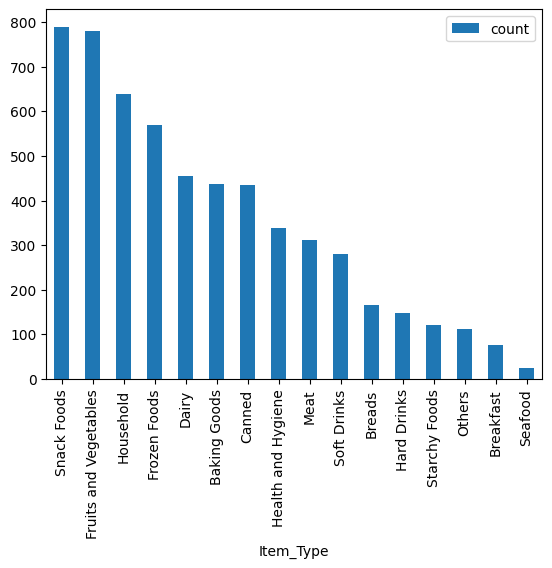

In [403]:
ItemType.plot(kind='bar')

In [404]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [405]:
data['Item_Identifier'].value_counts()

Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64

In [406]:
data['Item_Identifier_Grouped'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [407]:
data['Item_Identifier_Grouped'].value_counts()

Item_Identifier_Grouped
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

<Axes: xlabel='Item_Identifier_Grouped'>

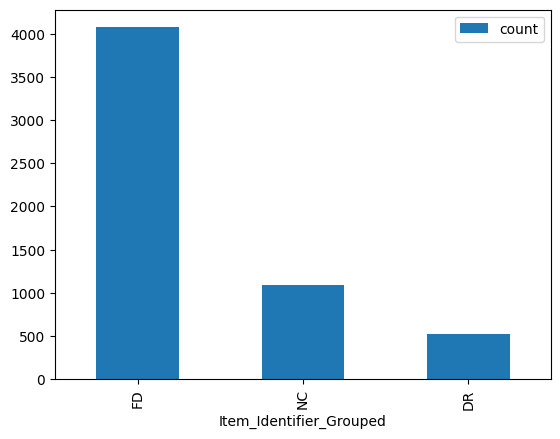

In [408]:
ItemIdentifier=pd.DataFrame(data['Item_Identifier_Grouped'].value_counts())
ItemIdentifier.plot(kind='bar')

In [409]:
data = data.drop(['Item_Identifier'],axis=1)

In [410]:
data.columns

Index(['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight_interpolation_imputation',
       'Item_Visibility_interpolate', 'Item_Identifier_Grouped'],
      dtype='object')

In [411]:
data['Outlet_Establishment_Year']

0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
5676    1997
5677    2009
5678    2002
5679    2007
5680    2002
Name: Outlet_Establishment_Year, Length: 5681, dtype: int64

In [412]:
import datetime as dt
current_year = dt.datetime.today().year
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.7500,0.007565,FD,25
1,Regular,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,8.3000,0.038428,FD,17
2,Low Fat,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,14.6000,0.099575,NC,26
3,Low Fat,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,7.3150,0.015388,FD,17
4,Regular,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.5575,0.118599,FD,39


<Axes: ylabel='Frequency'>

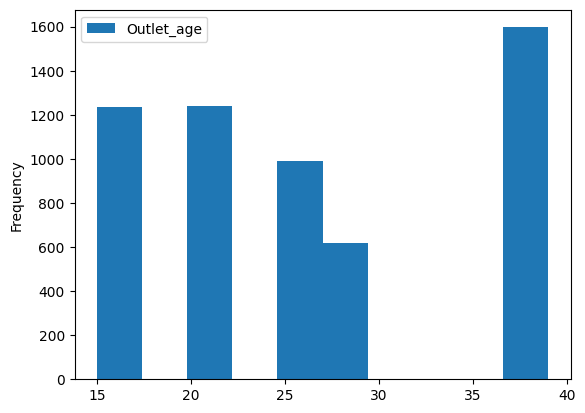

In [413]:
Outletage=pd.DataFrame(data['Outlet_age'])
Outletage.plot(kind='hist')

In [414]:
data = data.drop(['Outlet_Establishment_Year'],axis=1)
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,Low Fat,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,20.7500,0.007565,FD,25
1,Regular,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,8.3000,0.038428,FD,17
2,Low Fat,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,14.6000,0.099575,NC,26
3,Low Fat,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,7.3150,0.015388,FD,17
4,Regular,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,8.5575,0.118599,FD,39


In [415]:
from sklearn.preprocessing import OrdinalEncoder

encoded_data = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    encoded_data[col]=oe.fit_transform(encoded_data[[col]])
    print(oe.categories_)

[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]


In [416]:
test_Final=encoded_data.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolation_imputation',
'Item_Type','Outlet_Location_Type','Item_Identifier_Grouped','Item_Fat_Content'],axis=1)
test_Final.head()

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,107.8622,9.0,1.0,1.0,25
1,87.3198,2.0,2.0,1.0,17
2,241.7538,0.0,2.0,0.0,26
3,155.0340,2.0,2.0,1.0,17
4,234.2300,5.0,1.0,3.0,39


In [417]:
test_Final=test_Final.values.tolist()
test_Final

[[107.8622, 9.0, 1.0, 1.0, 25.0],
 [87.3198, 2.0, 2.0, 1.0, 17.0],
 [241.7538, 0.0, 2.0, 0.0, 26.0],
 [155.034, 2.0, 2.0, 1.0, 17.0],
 [234.23, 5.0, 1.0, 3.0, 39.0],
 [117.1492, 8.0, 2.0, 1.0, 27.0],
 [50.1034, 3.0, 1.0, 2.0, 15.0],
 [81.0592, 5.0, 1.0, 3.0, 39.0],
 [95.7436, 7.0, 2.0, 1.0, 22.0],
 [186.8924, 2.0, 2.0, 1.0, 17.0],
 [118.3466, 2.0, 2.0, 1.0, 17.0],
 [85.3908, 7.0, 2.0, 1.0, 22.0],
 [240.4196, 4.0, 2.0, 0.0, 39.0],
 [122.3098, 9.0, 1.0, 1.0, 25.0],
 [52.0298, 1.0, 0.0, 1.0, 37.0],
 [151.6366, 9.0, 1.0, 1.0, 25.0],
 [198.7768, 7.0, 2.0, 1.0, 22.0],
 [192.2188, 3.0, 1.0, 2.0, 15.0],
 [109.6912, 5.0, 1.0, 3.0, 39.0],
 [193.7136, 0.0, 2.0, 0.0, 26.0],
 [175.008, 1.0, 0.0, 1.0, 37.0],
 [239.9196, 6.0, 2.0, 1.0, 20.0],
 [47.7402, 8.0, 2.0, 1.0, 27.0],
 [142.347, 4.0, 2.0, 0.0, 39.0],
 [180.7318, 6.0, 2.0, 1.0, 20.0],
 [209.4928, 0.0, 2.0, 0.0, 26.0],
 [47.6034, 6.0, 2.0, 1.0, 20.0],
 [161.3894, 8.0, 2.0, 1.0, 27.0],
 [244.6802, 8.0, 2.0, 1.0, 27.0],
 [116.5492, 6.0, 2.0, 1.0, 

In [418]:
final=pd.DataFrame(xg_Final.predict(test_Final))
final

,0
0,1616.179077
1,1448.785034
2,588.002075
3,2536.292969
4,6212.969238
...,...
5676,2059.097656
5677,2542.495605
5678,2013.083862
5679,3655.640381


In [419]:
final.loc[0].values

array([1616.1791], dtype=float32)

In [420]:
print(f"Sales Value for 1st test data is between {(final.loc[0].values)-714.42} and {(final.loc[0].values)+714.42}")

Sales Value for 1st test data is between [901.7591] and [2330.599]
